In [1]:
import geopandas as gp

In [7]:
seoul = gp.GeoDataFrame.from_file('seoul1\seoul1.shp')

In [8]:
import glob
import pandas as pd
path = r"1\20180402"
allFiles = glob.glob(path+"\*.DAT")
list=[]
for filename in allFiles:
    df = pd.read_csv(filename, header = None)
    list.append(df)
a = pd.concat(list)

In [9]:
a = a.iloc[:,[0,1,2,4,8]]

In [10]:
a = a.rename(columns = {0:'id', 1:'longtitude', 2:'latitude', 4:'timestamp', 8:'assigned'})

In [11]:
a = a.sort_values(['id', 'timestamp']).reset_index(drop=True)
a2 = pd.DataFrame(a.shift(periods=-1, axis=0))
a3 = a.merge(a2, left_index=True, right_index=True, suffixes=('_prev', '_curr'))

In [12]:
a5 = a3[(a3['assigned_prev'] == 0) & (a3['assigned_curr'] == 1)]

In [13]:
a6 = a5[(a5['id_prev'] == a5['id_curr'])]

In [14]:
a7 = a6.loc[:,['latitude_curr','longtitude_curr']]

In [15]:
a7['latitude_curr'] = a7['latitude_curr']/10000000
a7['longtitude_curr'] = a7['longtitude_curr']/10000000
a9 = a8 = a7[(a7['latitude_curr']>30) & (a7['longtitude_curr']>120)]
a8 = a8.rename(columns={'longtitude_curr':'x','latitude_curr':'y'})
columns = ['x','y']
a8 = a8[columns]

In [16]:
a8 = a8.iloc[:4000,:]

In [17]:
import numpy as np

def custom_metric(central_1, central_2):
    lat1, lng1 = central_1
    lat2, lng2 = central_2

    lat1, lat2, lng1, lng2 = np.deg2rad(np.asarray([lat1, lat2, lng1, lng2]))

    dlat = lat2 - lat1
    dlng = lng2 - lng1

    h = (1 - np.cos(dlat))/2. + np.cos(lat1)*np.cos(lat2)*(1 - np.cos(dlng))/2.
    km = 2*6371*np.arcsin(np.sqrt(h))
    
    return km 

In [18]:
from scipy.cluster.hierarchy import linkage, cut_tree
Z = linkage(a8, method='average', metric=custom_metric)
y = cut_tree(Z, 70).flatten()

In [19]:
a8['hotspot']=y

In [23]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.plot(a8['x'],a8['y'],c=a8['hotspot'])

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000024E31AE36A8> (for post_execute):


ValueError: RGBA sequence should have length 3 or 4

ValueError: RGBA sequence should have length 3 or 4

<Figure size 720x432 with 1 Axes>

In [24]:
a8['hotspot']=a8['hotspot']/35

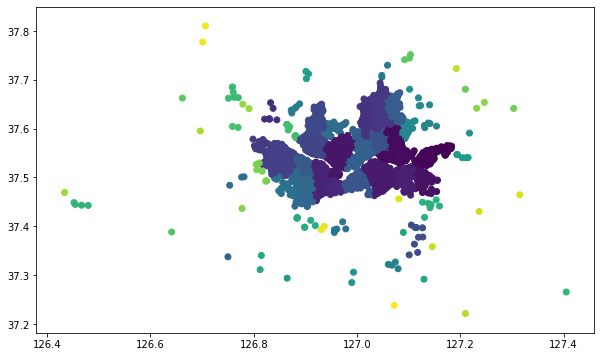

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.scatter(a8['x'],a8['y'],c=a8['hotspot'])

In [27]:
a8['hotspot']=a8['hotspot']*35

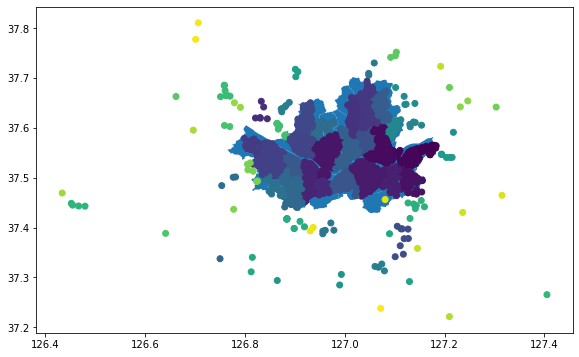

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, figsize=(10, 6))
seoul.plot(linewidth=0.8, ax=ax, facecolor="none", 
              edgecolor='black')
ax.scatter(a8['x'],a8['y'],c=a8['hotspot'])